# Cargill Fermentation data analyst hands on test

You have been sent a zip file containing 23CSV filesof fermentation data. Each file represents one fermentoror run. In addition there is an excel file containing the different conditionsused in each experiment. The pH and temperature were the variables under investigation.A series of outputs needs to be generated from these files. You are free to paste the outputs into a word/pdf with the codein a separate file but ideally you would submit a Jupyter notebook, R markdown or an equivalent output that combines the code and the outputs. Bonus points if you pusheverything as a Github repositoryand share the URL.Graphical examples of the output are shown for some of the questions. Axis and legends have usually been omitted but your plots should contain them.

## Libraries to be used

In [167]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np
import glob

import statsmodels
from statsmodels.stats.multitest import multipletests
import statsmodels.api as sm
from statsmodels.formula.api import ols



## Paths

In [2]:
path = 'datasets/Raw data' # use your path


## 1 Load the data
To avoid generating (manually) 23 variable, each with the dataset, and 1) since colummns are the same within datasets and 2) run column has the identifier of each column, all datasets will be concatenated

In [3]:
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

ferm_df = pd.concat(li, axis=0, ignore_index=True)

In [4]:
ferm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14932 entries, 0 to 14931
Data columns (total 49 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Days             14932 non-null  float64
 1   Temp             14932 non-null  float64
 2   mVVM             14932 non-null  float64
 3   pH               14932 non-null  float64
 4   pO2              14932 non-null  int64  
 5   RPM              14932 non-null  float64
 6   Scale1           14932 non-null  float64
 7   Scale2           14932 non-null  int64  
 8   Scale3           14932 non-null  int64  
 9   NT               14932 non-null  int64  
 10  Unused           14932 non-null  int64  
 11  O2-out           14929 non-null  float64
 12  CO2_out          14929 non-null  float64
 13  Cool_heat        14932 non-null  float64
 14  Acid_base        14932 non-null  float64
 15  Unused      .1   14932 non-null  int64  
 16  Unused      .2   14932 non-null  int64  
 17  OUR         

In [5]:
ferm_df.head()

,Days,Temp,mVVM,pH,pO2,RPM,Scale1,Scale2,Scale3,NT,...,Unused .10,Unused .11,Unused .12,Unused .13,Unused .14,Unused .15,Unused .16,Unused .17,Unused .18,run
0,0.000035,25.881,1001.687,6.907,0,849.024,4.754,0,0,0,...,0,0,0,0,0,0,0,0,0,KLG-61.745
1,0.001424,25.982,1001.687,6.909,0,859.822,4.796,0,0,0,...,0,0,0,0,0,0,0,0,0,KLG-61.745
2,0.002812,26.038,1001.828,6.909,0,854.306,4.810,0,0,0,...,0,0,0,0,0,0,0,0,0,KLG-61.745
3,0.004201,25.929,1002.100,6.910,0,853.891,4.754,0,0,0,...,0,0,0,0,0,0,0,0,0,KLG-61.745
4,0.005590,25.946,1001.687,6.909,0,844.286,4.802,0,0,0,...,0,0,0,0,0,0,0,0,0,KLG-61.745


Column Days contains data in float (decimal?) format. It will be treated as amount of a Day, where the data was collected. Coversion to hours will be done divinding each value to 1/24.

In [6]:
ferm_df['Days']=ferm_df['Days']/(1/24)

In [7]:
ferm_df.head()

,Days,Temp,mVVM,pH,pO2,RPM,Scale1,Scale2,Scale3,NT,...,Unused .10,Unused .11,Unused .12,Unused .13,Unused .14,Unused .15,Unused .16,Unused .17,Unused .18,run
0,0.000833,25.881,1001.687,6.907,0,849.024,4.754,0,0,0,...,0,0,0,0,0,0,0,0,0,KLG-61.745
1,0.034166,25.982,1001.687,6.909,0,859.822,4.796,0,0,0,...,0,0,0,0,0,0,0,0,0,KLG-61.745
2,0.067500,26.038,1001.828,6.909,0,854.306,4.810,0,0,0,...,0,0,0,0,0,0,0,0,0,KLG-61.745
3,0.100834,25.929,1002.100,6.910,0,853.891,4.754,0,0,0,...,0,0,0,0,0,0,0,0,0,KLG-61.745
4,0.134167,25.946,1001.687,6.909,0,844.286,4.802,0,0,0,...,0,0,0,0,0,0,0,0,0,KLG-61.745


## 1.1 Plot OUR and CER vs time

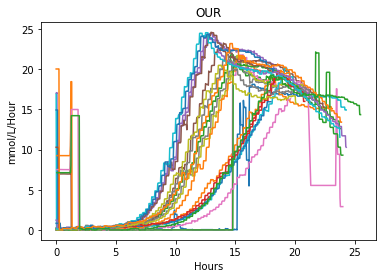

In [8]:
run_grouped = ferm_df.groupby([' run'])

fig, ax = plt.subplots()
for key, group in run_grouped:
    group.plot('Days', 'OUR', label=key, ax=ax, title='OUR', legend = False, xlabel='Hours', ylabel='mmol/L/Hour')

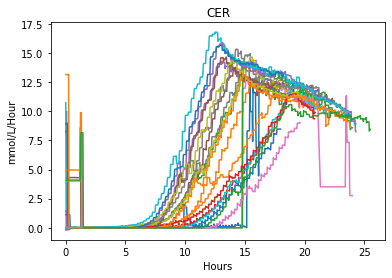

In [9]:
fig, ax = plt.subplots()
for key, group in run_grouped:
    group.plot('Days', 'CER', label=key, ax=ax, title='CER', legend = False, xlabel='Hours', ylabel='mmol/L/Hour')

## 2. Remove data that was collected earlier than 3 hours

In [10]:
ferm_df.drop(ferm_df[ferm_df.Days <3].index, inplace=True)

In [11]:
ferm_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12871 entries, 90 to 14931
Data columns (total 49 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Days             12871 non-null  float64
 1   Temp             12871 non-null  float64
 2   mVVM             12871 non-null  float64
 3   pH               12871 non-null  float64
 4   pO2              12871 non-null  int64  
 5   RPM              12871 non-null  float64
 6   Scale1           12871 non-null  float64
 7   Scale2           12871 non-null  int64  
 8   Scale3           12871 non-null  int64  
 9   NT               12871 non-null  int64  
 10  Unused           12871 non-null  int64  
 11  O2-out           12871 non-null  float64
 12  CO2_out          12871 non-null  float64
 13  Cool_heat        12871 non-null  float64
 14  Acid_base        12871 non-null  float64
 15  Unused      .1   12871 non-null  int64  
 16  Unused      .2   12871 non-null  int64  
 17  OUR        

### 2.1 REplot OUR and CER

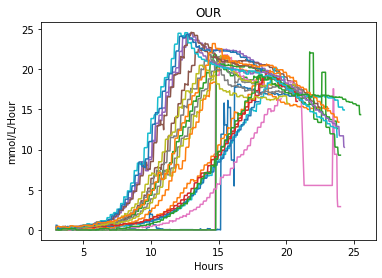

In [15]:
run_grouped = ferm_df.groupby([' run'])

fig, ax = plt.subplots()
for key, group in run_grouped:
    group.plot('Days', 'OUR', label=key, ax=ax, title='OUR', legend = False, xlabel='Hours', ylabel='mmol/L/Hour')

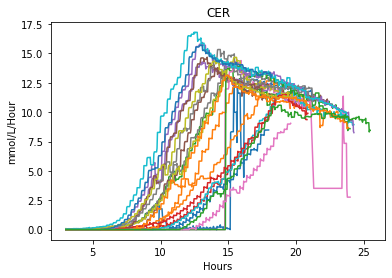

In [13]:
fig, ax = plt.subplots()
for key, group in run_grouped:
    group.plot('Days', 'CER', label=key, ax=ax, title='CER', legend = False, xlabel='Hours', ylabel='mmol/L/Hour')

## 3. Three of the experiments failed. Which? Remove them

In the graph, it can be seen that there are 3 runs that have flat lines up to 15 hours. Taking the average signal over the first 15 hours should reveal those 3

In [26]:
temp_df= ferm_df.loc[ferm_df.Days <15,['OUR',' run']]
run_grouped = temp_df.groupby([' run'])
run_grouped['OUR'].mean()

 run
KLG-61.745     0.137356
KLG-61.751     2.409386
KLG-61.755     6.040450
KLG-61.757     1.980464
KLG-61.760     9.761206
KLG-61.771     7.447453
KLG-61.772     0.374421
KLG-62.745     5.519100
KLG-62.755     5.195717
KLG-62.757     1.825833
KLG-62.760     1.906185
KLG-62.771     4.550451
KLG-62.772     0.338421
KLG-63.755     2.232586
KLG-63.757     9.319722
KLG-63.760     9.313360
KLG-63.771     0.992985
KLG-64.745     6.730839
KLG-64.751     7.079447
KLG-64.755    10.266317
KLG-64.757    10.102778
KLG-64.760     6.467691
KLG-64.771     1.762358
Name: OUR, dtype: float64

**KLG-61.745, KLG-61.772, KLG-62.772**

### 3.1 Remove them from the dataset

In [31]:
ferm_df.drop(ferm_df[(ferm_df[' run'] == 'KLG-61.745')| (ferm_df[' run'] == 'KLG-61.772')| (ferm_df[' run'] == 'KLG-62.772')].index, inplace=True)

In [32]:
ferm_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11125 entries, 733 to 14931
Data columns (total 49 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Days             11125 non-null  float64
 1   Temp             11125 non-null  float64
 2   mVVM             11125 non-null  float64
 3   pH               11125 non-null  float64
 4   pO2              11125 non-null  int64  
 5   RPM              11125 non-null  float64
 6   Scale1           11125 non-null  float64
 7   Scale2           11125 non-null  int64  
 8   Scale3           11125 non-null  int64  
 9   NT               11125 non-null  int64  
 10  Unused           11125 non-null  int64  
 11  O2-out           11125 non-null  float64
 12  CO2_out          11125 non-null  float64
 13  Cool_heat        11125 non-null  float64
 14  Acid_base        11125 non-null  float64
 15  Unused      .1   11125 non-null  int64  
 16  Unused      .2   11125 non-null  int64  
 17  OUR       

### 3.2 REplot OUR and CER

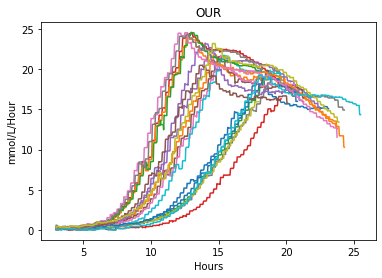

In [33]:
run_grouped = ferm_df.groupby([' run'])

fig, ax = plt.subplots()
for key, group in run_grouped:
    group.plot('Days', 'OUR', label=key, ax=ax, title='OUR', legend = False, xlabel='Hours', ylabel='mmol/L/Hour')

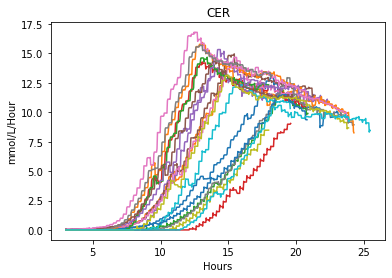

In [34]:
fig, ax = plt.subplots()
for key, group in run_grouped:
    group.plot('Days', 'CER', label=key, ax=ax, title='CER', legend = False, xlabel='Hours', ylabel='mmol/L/Hour')

## 4. The OUR measurement has a ‘stepped’ or stair like appearance. Can you think of an explanation why this has happened?

This stepped pattern may occurr because the sampling method creates a dicrete variable of the measurement, rather than a continous variable

## 5. Use either a rolling mean, interpolation or resampling method to make the data smoothand remove these ‘steps’. Remake the OUR and CER vs time graphs

In [48]:
ferm_df['OUR_RM']=ferm_df.OUR.rolling(window=10).mean()
ferm_df['CER_RM']=ferm_df.CER.rolling(window=10).mean()

In [49]:
ferm_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11125 entries, 733 to 14931
Data columns (total 51 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Days             11125 non-null  float64
 1   Temp             11125 non-null  float64
 2   mVVM             11125 non-null  float64
 3   pH               11125 non-null  float64
 4   pO2              11125 non-null  int64  
 5   RPM              11125 non-null  float64
 6   Scale1           11125 non-null  float64
 7   Scale2           11125 non-null  int64  
 8   Scale3           11125 non-null  int64  
 9   NT               11125 non-null  int64  
 10  Unused           11125 non-null  int64  
 11  O2-out           11125 non-null  float64
 12  CO2_out          11125 non-null  float64
 13  Cool_heat        11125 non-null  float64
 14  Acid_base        11125 non-null  float64
 15  Unused      .1   11125 non-null  int64  
 16  Unused      .2   11125 non-null  int64  
 17  OUR       

### 5.1 REplot OUR and CER

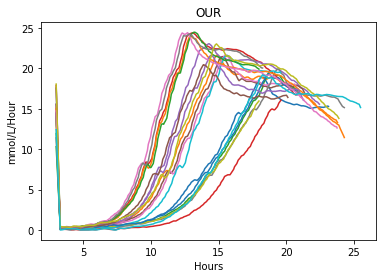

In [50]:
run_grouped = ferm_df.groupby([' run'])

fig, ax = plt.subplots()
for key, group in run_grouped:
    group.plot('Days', 'OUR_RM', label=key, ax=ax, title='OUR', legend = False, xlabel='Hours', ylabel='mmol/L/Hour')

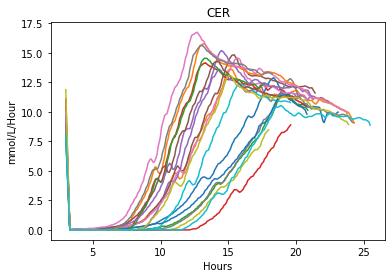

In [51]:
fig, ax = plt.subplots()
for key, group in run_grouped:
    group.plot('Days', 'CER_RM', label=key, ax=ax, title='CER', legend = False, xlabel='Hours', ylabel='mmol/L/Hour')

## 6. Read in the excel file with the annotations. Map the temperature and pH setpoints on the corresponding individual runs as new columns in the existing data frame

In [52]:
annot_df = pd.read_excel('datasets/Raw data/Annotation.xlsx')
annot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Batch                  25 non-null     int64  
 1   Seed temperature (°C)  25 non-null     int64  
 2   Seed pH                25 non-null     float64
 3   Seed slot              25 non-null     int64  
 4   Seed_id                25 non-null     object 
dtypes: float64(1), int64(3), object(1)
memory usage: 1.1+ KB


In [53]:
annot_df.head()

,Batch,Seed temperature (°C),Seed pH,Seed slot,Seed_id
0,745,26,6.85,64,F64.745
1,745,26,6.85,62,F62.745
2,745,26,6.85,61,F61.745
3,751,26,6.85,64,F64.751
4,751,24,6.85,61,F61.751


### 6.1 The Seed_id does not match exactly to the run. It will be changed to macth accordingly

In [79]:
annot_df['Seed_id']=annot_df['Seed_id'].str.replace("F", "KLG-")
annot_df.head()

,Batch,Seed temperature (°C),Seed pH,Seed slot,Seed_id
0,745,26,6.85,64,KLG-64.745
1,745,26,6.85,62,KLG-62.745
2,745,26,6.85,61,KLG-61.745
3,751,26,6.85,64,KLG-64.751
4,751,24,6.85,61,KLG-61.751


### 6.2 Map the annotations to the original dataframe

In [80]:
merged_df=ferm_df.merge(annot_df, left_on=[' run'], right_on=['Seed_id'], how='inner')

In [81]:
merged_df.head()

,Days,Temp,mVVM,pH,pO2,RPM,Scale1,Scale2,Scale3,NT,...,Unused .17,Unused .18,run,OUR_RM,CER_RM,Batch,Seed temperature (°C),Seed pH,Seed slot,Seed_id
0,3.004166,23.902,1001.636,7.030,0,865.116,4.494,0,0,0,...,0,0,KLG-61.751,NaN,NaN,751,24,6.85,61,KLG-61.751
1,3.037500,23.955,1001.552,7.029,0,849.915,4.550,0,0,0,...,0,0,KLG-61.751,NaN,NaN,751,24,6.85,61,KLG-61.751
2,3.070834,24.050,1001.624,7.029,0,844.874,4.486,0,0,0,...,0,0,KLG-61.751,NaN,NaN,751,24,6.85,61,KLG-61.751
3,3.104167,23.989,1001.529,7.029,0,837.635,4.496,0,0,0,...,0,0,KLG-61.751,NaN,NaN,751,24,6.85,61,KLG-61.751
4,3.137501,23.940,1001.584,7.029,0,841.171,4.495,0,0,0,...,0,0,KLG-61.751,NaN,NaN,751,24,6.85,61,KLG-61.751


## 7. Summarize the OUR of all the runs according to setpoint temperature(mean/median) and generate a graph of with a single line for each temperature setpoint and with hours on the x-axis and the OUR on the y-axis. Color or style the lines according to the target temperature values. Plot a 95% confidenceor thestandard deviationaround each line.(example shown below

In [113]:
temp_grouped = merged_df.groupby(['Seed temperature (°C)','Days'])['OUR_RM'].median().reset_index()
temp_grouped_sem = merged_df.groupby(['Seed temperature (°C)','Days'])['OUR_RM'].sem().reset_index()
temp_grouped_sem.rename(columns={'OUR_RM':'sem'},inplace=True)
temp_grouped_n = merged_df.groupby(['Seed temperature (°C)','Days'])['OUR_RM'].count().reset_index()


In [114]:
temp_grouped=pd.concat([temp_grouped,temp_grouped_sem['sem']],axis=1)

,Seed temperature (°C),Days,OUR_RM,sem
0,24,3.002501,15.140144,2.739916
1,24,3.003334,13.640971,1.059327
2,24,3.003890,17.549181,NaN
3,24,3.004166,NaN,NaN
4,24,3.035834,13.434363,2.437934
...,...,...,...,...
8183,28,24.154440,11.950525,NaN
8184,28,24.187776,11.833752,NaN
8185,28,24.221112,11.717586,NaN
8186,28,24.254448,11.576182,NaN


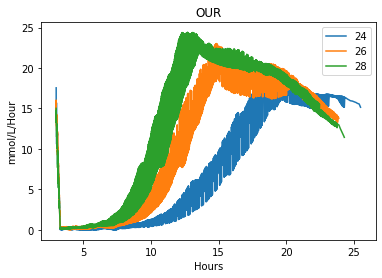

In [116]:
fig, ax = plt.subplots()
for key, group in temp_grouped.groupby(['Seed temperature (°C)']):
    group.plot('Days', 'OUR_RM', label=key, ax=ax, title='OUR', legend = True, xlabel='Hours', ylabel='mmol/L/Hour')
    

### 7.2 The trend of the graph is similar to the example, however variation in this output is way higher. Inspection of the number of samples per time revealed that the number of samples in each timepoint differ

Text(0, 0.5, 'Number of samples')

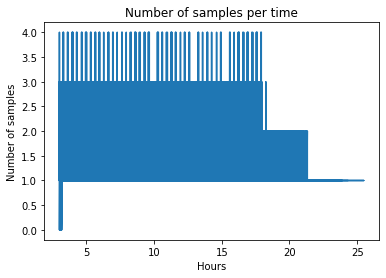

In [108]:
plt.plot(temp_grouped_n.Days, temp_grouped_n.OUR_RM)
plt.title('Number of samples per time')
plt.xlabel('Hours')
plt.ylabel('Number of samples')

### 8 Calculate the(trapezoidal)integral of the OUR minus CER by time(result has the unit of mmol/L) and add it to a new column. Make a plot of the integral of the OUR-CER on the y-axis, hours on the x-axis and an individual line for each run.

1. Since the integral is the area under the curve, calculating the difference between the two colums will give the integral difference.

In [121]:
ferm_df['OUR_CER']=ferm_df['OUR_RM']-ferm_df['CER_RM']

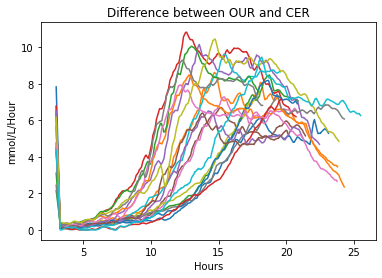

In [122]:
run_grouped = ferm_df.groupby([' run'])

fig, ax = plt.subplots()
for key, group in run_grouped:
    group.plot('Days', 'OUR_CER', label=key, ax=ax, title='Difference between OUR and CER', legend = False, xlabel='Hours', ylabel='mmol/L/Hour')

## 9. Fit an exponential growth equationto exponential phase for each of the individual runs of the form P*e^(rt) Select the appropriate exponential part of the data automatically. We are notinterested inthe initial population(P), it was the same for all runsjust r.Calculate r for both the OUR and the CER. Does it make a difference for theresult?Is an exponential curve the right equation for the data?

## 10 Pick a threshold value for the OUR that all run’s reach(e.g. half height of the curves maximum). Return a table with the time in hours that the individual runscross this thresholdwith this value as the ‘Crossing time’.

### 10.1 Find crossing time=max_height/2

In [140]:
crossing_time=pd.DataFrame(run_grouped.OUR_RM.max()/2)
crossing_time.rename(columns={'OUR_RM': 'Crossing_time'}, inplace=True)

In [141]:
crossing_time

,Crossing_time
run,
KLG-61.751,9.450335
KLG-61.755,10.815800
KLG-61.757,9.818008
KLG-61.760,12.199948
KLG-61.771,11.519534
KLG-62.745,10.729896
KLG-62.755,10.808226
KLG-62.757,9.968033
KLG-62.760,7.976877


### 10.2 Merge with the annotation dataframe

In [144]:
cross_df= crossing_time.merge(annot_df, left_on=[' run'], right_on=['Seed_id'], how='inner')

In [148]:
cross_df.rename(columns={'Seed temperature (°C)':'Temp','Seed pH':'pH'}, inplace=True)
cross_df.head()

,Crossing_time,Batch,Temp,pH,Seed slot,Seed_id
0,9.450335,751,24,6.85,61,KLG-61.751
1,10.815800,755,26,7.20,61,KLG-61.755
2,9.818008,757,24,7.20,61,KLG-61.757
3,12.199948,760,28,7.20,61,KLG-61.760
4,11.519534,771,28,7.20,61,KLG-61.771


## 11. Perform an ANOVA on these ‘Crossing times’ with pH and temperature as the factors. 

### 11.1 Report the table with your interpretationof which factors are significant

In [149]:
model = ols('Crossing_time ~ C(pH) + C(Temp)', data=cross_df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(pH),0.405535,1.0,1.789656,1.996734e-01
C(Temp),23.491236,2.0,51.834232,1.021227e-07
Residual,3.625594,16.0,NaN,NaN


**Temperature is a significant factor**

This conclusion is consistent with the data. A visual inspection shows that there are clear crossing time differences between temperatures but not between pH

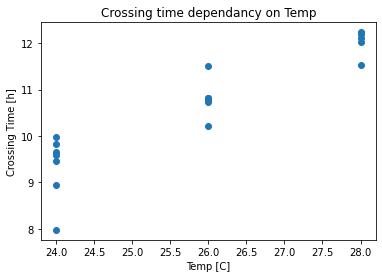

In [156]:
plt.scatter('Temp','Crossing_time', data=cross_df)
plt.title('Crossing time dependancy on Temp')
plt.xlabel('Temp [C]')
plt.ylabel('Crossing Time [h]')
plt.show()

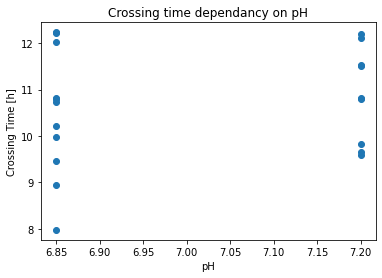

In [157]:
plt.scatter('pH','Crossing_time', data=cross_df)
plt.title('Crossing time dependancy on pH')
plt.xlabel('pH')
plt.ylabel('Crossing Time [h]')
plt.show()

### 11.2 Does the data meet the requirements for the ANOVA you chose?

The data was collected independently, which is one of the key assumption of ANOVA. Visually observing the data did not reveal normality issues, however, a more appropiate test (eg Levene's test) should be done to verify this fact

### 11.3 Apply a suitable post-hoc testif any effects are significantand show the means for the levels

In [170]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey =pairwise_tukeyhsd(endog=cross_df['Crossing_time'],
                          groups=cross_df['Temp'],
                          alpha=0.05)

print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
    24     26   1.4681 0.001 0.8006 2.1357   True
    24     28   2.7074 0.001 2.0126 3.4022   True
    26     28   1.2392 0.001 0.5444  1.934   True
-------------------------------------------------
